In [24]:
#Compare runtime of drama vs comedy movie distributions, imdb dataset
import pandas as pd
import random
from scipy import stats

#Get random data from 1% of the file
readProportion = 0.5
data = pd.read_table('https://datasets.imdbws.com/title.basics.tsv.gz',
                    header=0, skiprows=lambda i: i > 0 and random.random() > readProportion,
                    sep='\t')
data = data.sample(frac=1)
#Rids empty entries
dataFull = data[(data.runtimeMinutes != r'\N') & (data.runtimeMinutes.str.isnumeric())].copy()
#Converts runtime minutes from string to int
dataFull.loc[:, 'runtimeMinutes'] = dataFull.runtimeMinutes.astype(int)
#Movies, ignoring outliers
movies = dataFull[(dataFull.titleType == 'movie') & (dataFull.runtimeMinutes < 400)]

In [25]:
#Filtering dramas
drama = movies[movies.genres.str.contains('Drama')]

In [26]:
#Filtering comedies
comedy = movies[movies.genres.str.contains('Comedy')]

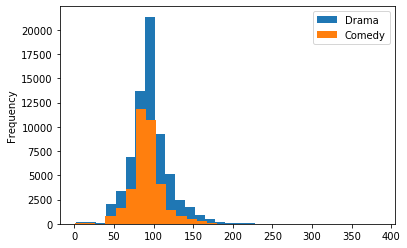

In [27]:
#Plot series as histograms
dramaMins = drama.runtimeMinutes.copy()
comedyMins = comedy.runtimeMinutes.copy()
#both = pd.concat([dramaMins, comedyMins],ignore_index=True, axis=1)
dramaMins.plot.hist(bins=30, label='Drama', legend=True)
comedyMins.plot.hist(bins=30, label='Comedy', legend=True)

In [28]:
#2 sample t-test
[statisticInclude, pvalueInclude] = stats.ttest_ind(dramaMins, comedyMins)
print(f'test statistic: {statisticInclude}, p-value: {pvalueInclude}')

test statistic: 20.550122522732657, p-value: 1.177745731895851e-93


In [36]:
#Detailed statistics
print('Drama:\n', dramaMins.describe())
print('Comedy:\n', comedyMins.describe())

Drama:
 count    68322.000000
mean        95.261746
std         25.165744
min          2.000000
25%         82.000000
50%         93.000000
75%        106.000000
max        378.000000
Name: runtimeMinutes, dtype: float64
Comedy:
 count    36072.000000
mean        92.091761
std         20.644443
min          1.000000
25%         82.000000
50%         90.000000
75%        100.000000
max        385.000000
Name: runtimeMinutes, dtype: float64


In [29]:
#Filtering only dramas
dramaOnly = movies[movies.genres == 'Drama']

In [30]:
#Filtering only comedies
comedyOnly = movies[movies.genres == 'Comedy']

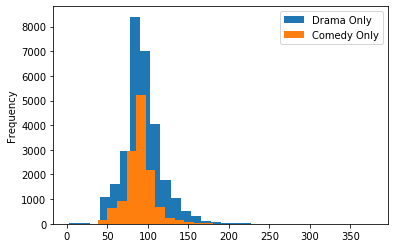

In [31]:
#Plot series as histograms
dramaOnlyMins = dramaOnly.runtimeMinutes.copy()
comedyOnlyMins = comedyOnly.runtimeMinutes.copy()
#both = pd.concat([dramaMins, comedyMins],ignore_index=True, axis=1)
dramaOnlyMins.plot.hist(bins=30, label='Drama Only', legend=True)
comedyOnlyMins.plot.hist(bins=30, label='Comedy Only', legend=True)

In [32]:
#2 sample t-test
[statisticOnly, pvalueOnly] = stats.ttest_ind(dramaOnlyMins, comedyOnlyMins)
print(f'test statistic: {statisticOnly}, p-value: {pvalueOnly}')

test statistic: 16.13399824669848, p-value: 2.196912147673971e-58


In [35]:
#Detailed statistics
print('Drama only:\n', dramaOnlyMins.describe())
print('Comedy only:\n', comedyOnlyMins.describe())

Drama only:
 count    29130.000000
mean        93.871953
std         23.787791
min          3.000000
25%         81.000000
50%         91.000000
75%        105.000000
max        378.000000
Name: runtimeMinutes, dtype: float64
Comedy only:
 count    13310.000000
mean        90.127348
std         18.186003
min          2.000000
25%         82.000000
50%         90.000000
75%         98.000000
max        360.000000
Name: runtimeMinutes, dtype: float64
